# Tugas Praktikum - JS11

Nama: Hidayat Widi Saputra  
NIM: 2341720157  
Kelas: TI-3G

---

## Tugas 1: SVM dengan Voice Dataset

Buatlah model SVM dengan menggunakan data voice.csv dengan ketentuan:
- Split data dengan rasio 70:30 dan 80:20 untuk setiap model yang akan dibangun
- Gunakan model dengan kernel linier
- Gunakan model dengan kernel polynomial
- Gunakan model dengan kernel RBF
- Tabulasikan performansi setiap split dan kernel berdasarkan metrik akurasi



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load dataset
df = pd.read_csv('voice.csv')

# Display basic information
print("Shape of dataset:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nDataset info:")
print(df.info())
print("\nLabel distribution:")
print(df['label'].value_counts())

Shape of dataset: (3168, 21)

First 5 rows:
   meanfreq        sd    median       Q25       Q75       IQR       skew  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2  0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3  0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4  0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   

          kurt    sp.ent       sfm  ...  centroid   meanfun    minfun  \
0   274.402906  0.893369  0.491918  ...  0.059781  0.084279  0.015702   
1   634.613855  0.892193  0.513724  ...  0.066009  0.107937  0.015826   
2  1024.927705  0.846389  0.478905  ...  0.077316  0.098706  0.015656   
3     4.177296  0.963322  0.727232  ...  0.151228  0.088965  0.017798   
4     4.333713  0.971955  0.783568  ...  0.135120  0.106398  0.016931   

     maxfun   meandom    mindom    maxdom   dfrange   modind

In [ ]:
# Separate features and target
X = df.drop('label', axis=1)
y = df['label']

# Encode labels (male=0, female=1)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

print("Encoded labels:", le.classes_)
print("Label mapping: male -> 0, female -> 1")

Encoded labels: ['female' 'male']
Label mapping: male -> 0, female -> 1


In [ ]:
def train_and_evaluate_svm(X_train, X_test, y_train, y_test, kernel, split_ratio):
    """
    Train SVM model with specified kernel and evaluate performance
    """
    # Create and train model
    model = SVC(kernel=kernel, random_state=42)
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"\n{'='*60}")
    print(f"Split Ratio: {split_ratio} | Kernel: {kernel.upper()}")
    print(f"{'='*60}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=le.classes_))
    
    return accuracy, model

In [ ]:
# Split 70:30
X_train_70, X_test_70, y_train_70, y_test_70 = train_test_split(
    X, y_encoded, test_size=0.3, random_state=42
)

print(f"Training set size: {len(X_train_70)}")
print(f"Test set size: {len(X_test_70)}")

# Dictionary to store results
results_70 = {}

# Train with Linear kernel
acc_linear_70, model_linear_70 = train_and_evaluate_svm(
    X_train_70, X_test_70, y_train_70, y_test_70, 'linear', '70:30'
)
results_70['linear'] = acc_linear_70

# Train with Polynomial kernel
acc_poly_70, model_poly_70 = train_and_evaluate_svm(
    X_train_70, X_test_70, y_train_70, y_test_70, 'poly', '70:30'
)
results_70['poly'] = acc_poly_70

# Train with RBF kernel
acc_rbf_70, model_rbf_70 = train_and_evaluate_svm(
    X_train_70, X_test_70, y_train_70, y_test_70, 'rbf', '70:30'
)
results_70['rbf'] = acc_rbf_70

Training set size: 2217
Test set size: 951

Split Ratio: 70:30 | Kernel: LINEAR
Accuracy: 0.9264

Classification Report:
              precision    recall  f1-score   support

      female       0.98      0.86      0.92       452
        male       0.89      0.98      0.93       499

    accuracy                           0.93       951
   macro avg       0.93      0.92      0.93       951
weighted avg       0.93      0.93      0.93       951


Split Ratio: 70:30 | Kernel: LINEAR
Accuracy: 0.9264

Classification Report:
              precision    recall  f1-score   support

      female       0.98      0.86      0.92       452
        male       0.89      0.98      0.93       499

    accuracy                           0.93       951
   macro avg       0.93      0.92      0.93       951
weighted avg       0.93      0.93      0.93       951


Split Ratio: 70:30 | Kernel: POLY
Accuracy: 0.4900

Classification Report:
              precision    recall  f1-score   support

      female    

In [ ]:
# Split 80:20
X_train_80, X_test_80, y_train_80, y_test_80 = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42
)

print(f"Training set size: {len(X_train_80)}")
print(f"Test set size: {len(X_test_80)}")

# Dictionary to store results
results_80 = {}

# Train with Linear kernel
acc_linear_80, model_linear_80 = train_and_evaluate_svm(
    X_train_80, X_test_80, y_train_80, y_test_80, 'linear', '80:20'
)
results_80['linear'] = acc_linear_80

# Train with Polynomial kernel
acc_poly_80, model_poly_80 = train_and_evaluate_svm(
    X_train_80, X_test_80, y_train_80, y_test_80, 'poly', '80:20'
)
results_80['poly'] = acc_poly_80

# Train with RBF kernel
acc_rbf_80, model_rbf_80 = train_and_evaluate_svm(
    X_train_80, X_test_80, y_train_80, y_test_80, 'rbf', '80:20'
)
results_80['rbf'] = acc_rbf_80

Training set size: 2534
Test set size: 634

Split Ratio: 80:20 | Kernel: LINEAR
Accuracy: 0.9416

Classification Report:
              precision    recall  f1-score   support

      female       0.98      0.89      0.93       297
        male       0.91      0.99      0.95       337

    accuracy                           0.94       634
   macro avg       0.95      0.94      0.94       634
weighted avg       0.94      0.94      0.94       634


Split Ratio: 80:20 | Kernel: LINEAR
Accuracy: 0.9416

Classification Report:
              precision    recall  f1-score   support

      female       0.98      0.89      0.93       297
        male       0.91      0.99      0.95       337

    accuracy                           0.94       634
   macro avg       0.95      0.94      0.94       634
weighted avg       0.94      0.94      0.94       634


Split Ratio: 80:20 | Kernel: POLY
Accuracy: 0.4826

Classification Report:
              precision    recall  f1-score   support

      female    

In [ ]:
# Create summary table
summary_data = {
    'Split Ratio': ['70:30', '70:30', '70:30', '80:20', '80:20', '80:20'],
    'Kernel': ['Linear', 'Polynomial', 'RBF', 'Linear', 'Polynomial', 'RBF'],
    'Accuracy': [
        results_70['linear'],
        results_70['poly'],
        results_70['rbf'],
        results_80['linear'],
        results_80['poly'],
        results_80['rbf']
    ]
}

summary_df = pd.DataFrame(summary_data)
print("\n" + "="*60)
print("RINGKASAN PERFORMANSI MODEL SVM - VOICE DATASET")
print("="*60)
print(summary_df.to_string(index=False))
print("="*60)

# Find best model
best_idx = summary_df['Accuracy'].idxmax()
best_model = summary_df.iloc[best_idx]
print(f"\nModel Terbaik:")
print(f"Split Ratio: {best_model['Split Ratio']}")
print(f"Kernel: {best_model['Kernel']}")
print(f"Accuracy: {best_model['Accuracy']:.4f}")


RINGKASAN PERFORMANSI MODEL SVM - VOICE DATASET
Split Ratio     Kernel  Accuracy
      70:30     Linear  0.926393
      70:30 Polynomial  0.490011
      70:30        RBF  0.662461
      80:20     Linear  0.941640
      80:20 Polynomial  0.482650
      80:20        RBF  0.656151

Model Terbaik:
Split Ratio: 80:20
Kernel: Linear
Accuracy: 0.9416


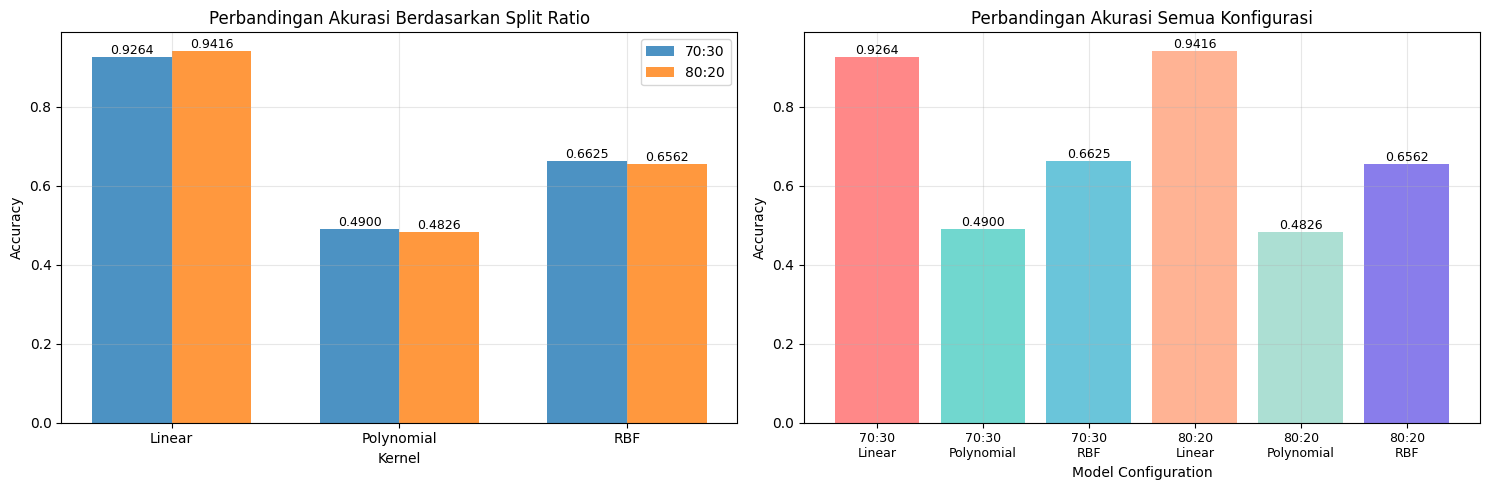

In [ ]:
# Visualize results
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Comparison by split ratio
kernels = ['Linear', 'Polynomial', 'RBF']
acc_70 = [results_70['linear'], results_70['poly'], results_70['rbf']]
acc_80 = [results_80['linear'], results_80['poly'], results_80['rbf']]

x = np.arange(len(kernels))
width = 0.35

bars1 = ax[0].bar(x - width/2, acc_70, width, label='70:30', alpha=0.8)
bars2 = ax[0].bar(x + width/2, acc_80, width, label='80:20', alpha=0.8)

ax[0].set_xlabel('Kernel')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Perbandingan Akurasi Berdasarkan Split Ratio')
ax[0].set_xticks(x)
ax[0].set_xticklabels(kernels)
ax[0].legend()
ax[0].grid(True, alpha=0.3)

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax[0].text(bar.get_x() + bar.get_width()/2., height,
                   f'{height:.4f}',
                   ha='center', va='bottom', fontsize=9)

# Plot 2: Overall comparison
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8', '#6C5CE7']
ax[1].bar(range(len(summary_df)), summary_df['Accuracy'], color=colors, alpha=0.8)
ax[1].set_xlabel('Model Configuration')
ax[1].set_ylabel('Accuracy')
ax[1].set_title('Perbandingan Akurasi Semua Konfigurasi')
ax[1].set_xticks(range(len(summary_df)))
ax[1].set_xticklabels([f"{row['Split Ratio']}\n{row['Kernel']}" 
                        for _, row in summary_df.iterrows()], fontsize=9)
ax[1].grid(True, alpha=0.3)

# Add value labels
for i, v in enumerate(summary_df['Accuracy']):
    ax[1].text(i, v, f'{v:.4f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

## Tugas 2: Klasifikasi Siang/Malam dengan Histogram

Gunakan data pada praktikum 5 untuk membuat model klasifikasi siang dan malam menggunakan SVM dengan kernel RBF menggunakan fitur histrogram. Gunakan rasio 80:20. Bereksperimen dengan hyperparameter tunning dari kernel RBF.

In [ ]:
import cv2
from pathlib import Path
from sklearn.model_selection import GridSearchCV

In [ ]:
def load_dataset(img_dir):
    """Load images from directory"""
    p = Path(img_dir)
    dirs = p.glob('*')
    
    img_list = []
    
    for dir in dirs:
        label = dir.name
        for file in dir.glob('*.jpg'):
            img = cv2.imread(str(file))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            
            if img is not None:
                img_list.append((img, label))
    
    return img_list

# Load training and test data
train_dir = "images/training/"
test_dir = "images/test/"

train_img = load_dataset(train_dir)
test_img = load_dataset(test_dir)

print(f"Training images: {len(train_img)}")
print(f"Test images: {len(test_img)}")

Training images: 240
Test images: 160


In [ ]:
def standardize_input(image):
    """Standardize image size"""
    std_img = cv2.resize(image, (1100, 600))
    return std_img

def label_encoder(label):
    """Encode label: day as 1, night as 0"""
    return 1 if label == 'day' else 0

def preprocess(img_list):
    """Preprocess images and labels"""
    std_img_list = []
    
    for item in img_list:
        image = item[0]
        label = item[1]
        
        # Standardize the image
        std_img = standardize_input(image)
        
        # Encode the label
        img_label = label_encoder(label)
        
        std_img_list.append((std_img, img_label))
    
    return std_img_list

# Preprocess data
train_std_img_list = preprocess(train_img)
test_std_img_list = preprocess(test_img)

print("Preprocessing completed!")
print(f"Training set: {len(train_std_img_list)} images")
print(f"Test set: {len(test_std_img_list)} images")

Preprocessing completed!
Training set: 240 images
Test set: 160 images


In [ ]:
def extract_histogram_features(image, bins=32):
    """
    Extract histogram features from HSV color space
    bins: number of bins for histogram
    """
    # Convert to HSV
    img_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    
    # Calculate histogram for each channel
    hist_features = []
    
    for i in range(3):  # H, S, V channels
        hist = cv2.calcHist([img_hsv], [i], None, [bins], [0, 256])
        hist = hist.flatten()
        # Normalize histogram
        hist = hist / (hist.sum() + 1e-7)
        hist_features.extend(hist)
    
    return np.array(hist_features)

def extract_features_from_dataset(img_list, bins=32):
    """Extract histogram features from all images"""
    features = []
    labels = []
    
    for img, label in img_list:
        hist_features = extract_histogram_features(img, bins)
        features.append(hist_features)
        labels.append(label)
    
    return np.array(features), np.array(labels)

# Extract features with different bin sizes
print("Extracting histogram features...")
X_train_hist, y_train_hist = extract_features_from_dataset(train_std_img_list, bins=32)
X_test_hist, y_test_hist = extract_features_from_dataset(test_std_img_list, bins=32)

print(f"\nFeature shape: {X_train_hist.shape}")
print(f"Training samples: {len(X_train_hist)}")
print(f"Test samples: {len(X_test_hist)}")
print(f"Feature dimension: {X_train_hist.shape[1]} (32 bins × 3 channels)")

Extracting histogram features...

Feature shape: (240, 96)
Training samples: 240
Test samples: 160
Feature dimension: 96 (32 bins × 3 channels)

Feature shape: (240, 96)
Training samples: 240
Test samples: 160
Feature dimension: 96 (32 bins × 3 channels)


In [ ]:
# Split data with 80:20 ratio
X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train_hist, y_train_hist, test_size=0.2, random_state=42
)

print(f"Training set: {len(X_train_final)} samples")
print(f"Validation set: {len(X_val)} samples")
print(f"Test set: {len(X_test_hist)} samples")

# Define parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1]
}

print("\nPerforming Grid Search for hyperparameter tuning...")
print("This may take a few minutes...")

# Create SVM model with RBF kernel
svm_rbf = SVC(kernel='rbf', random_state=42)

# Perform Grid Search
grid_search = GridSearchCV(svm_rbf, param_grid, cv=3, scoring='accuracy', 
                           verbose=1, n_jobs=-1)
grid_search.fit(X_train_final, y_train_final)

print("\n" + "="*60)
print("HYPERPARAMETER TUNING RESULTS")
print("="*60)
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")
print("="*60)

Training set: 192 samples
Validation set: 48 samples
Test set: 160 samples

Performing Grid Search for hyperparameter tuning...
This may take a few minutes...
Fitting 3 folds for each of 24 candidates, totalling 72 fits

HYPERPARAMETER TUNING RESULTS
Best parameters: {'C': 1, 'gamma': 'scale'}
Best cross-validation score: 0.9948

HYPERPARAMETER TUNING RESULTS
Best parameters: {'C': 1, 'gamma': 'scale'}
Best cross-validation score: 0.9948


In [ ]:
# Get best model
best_model = grid_search.best_estimator_

# Evaluate on validation set
y_val_pred = best_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)

# Evaluate on test set
y_test_pred = best_model.predict(X_test_hist)
test_accuracy = accuracy_score(y_test_hist, y_test_pred)

print("\n" + "="*60)
print("MODEL PERFORMANCE")
print("="*60)
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print("="*60)

print("\nClassification Report (Test Set):")
print(classification_report(y_test_hist, y_test_pred, 
                          target_names=['night', 'day']))


MODEL PERFORMANCE
Validation Accuracy: 1.0000
Test Accuracy: 0.9875

Classification Report (Test Set):
              precision    recall  f1-score   support

       night       0.98      1.00      0.99        80
         day       1.00      0.97      0.99        80

    accuracy                           0.99       160
   macro avg       0.99      0.99      0.99       160
weighted avg       0.99      0.99      0.99       160



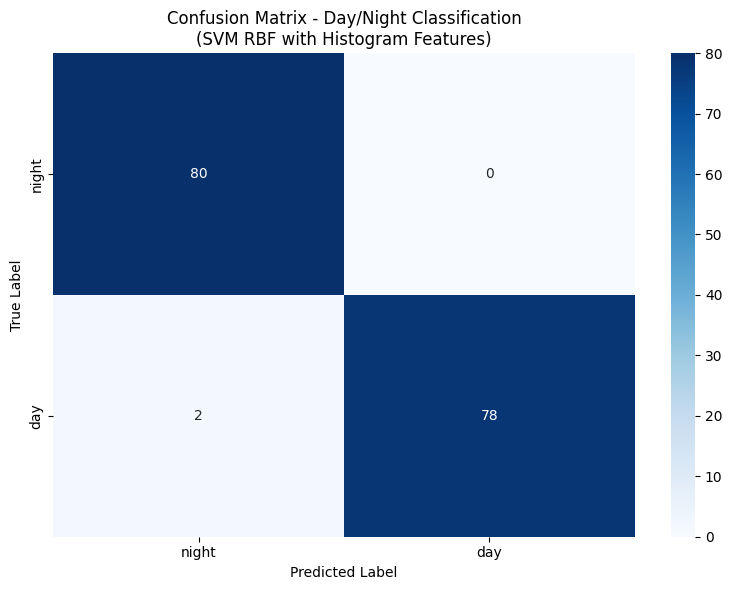


Confusion Matrix Interpretation:
True Negatives (Night predicted as Night): 80
False Positives (Night predicted as Day): 0
False Negatives (Day predicted as Night): 2
True Positives (Day predicted as Day): 78


In [ ]:
# Plot confusion matrix
cm = confusion_matrix(y_test_hist, y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['night', 'day'],
            yticklabels=['night', 'day'])
plt.title('Confusion Matrix - Day/Night Classification\n(SVM RBF with Histogram Features)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

print("\nConfusion Matrix Interpretation:")
print(f"True Negatives (Night predicted as Night): {cm[0, 0]}")
print(f"False Positives (Night predicted as Day): {cm[0, 1]}")
print(f"False Negatives (Day predicted as Night): {cm[1, 0]}")
print(f"True Positives (Day predicted as Day): {cm[1, 1]}")

In [ ]:
# Experiment with different bin sizes
bin_sizes = [16, 32, 64]
bin_results = {}

print("Experimenting with different histogram bin sizes...")
print("="*60)

for bins in bin_sizes:
    print(f"\nTesting with {bins} bins...")
    
    # Extract features
    X_train_exp, y_train_exp = extract_features_from_dataset(train_std_img_list, bins=bins)
    X_test_exp, y_test_exp = extract_features_from_dataset(test_std_img_list, bins=bins)
    
    # Train model with best hyperparameters from previous search
    model_exp = SVC(kernel='rbf', 
                   C=grid_search.best_params_['C'],
                   gamma=grid_search.best_params_['gamma'],
                   random_state=42)
    
    model_exp.fit(X_train_exp, y_train_exp)
    
    # Evaluate
    y_pred_exp = model_exp.predict(X_test_exp)
    acc_exp = accuracy_score(y_test_exp, y_pred_exp)
    
    bin_results[bins] = acc_exp
    print(f"Accuracy with {bins} bins: {acc_exp:.4f}")
    print(f"Feature dimension: {X_train_exp.shape[1]} ({bins} bins × 3 channels)")

print("\n" + "="*60)
print("COMPARISON OF DIFFERENT BIN SIZES")
print("="*60)
for bins, acc in bin_results.items():
    print(f"{bins} bins: {acc:.4f}")
print("="*60)

Experimenting with different histogram bin sizes...

Testing with 16 bins...
Accuracy with 16 bins: 0.9875
Feature dimension: 48 (16 bins × 3 channels)

Testing with 32 bins...
Accuracy with 16 bins: 0.9875
Feature dimension: 48 (16 bins × 3 channels)

Testing with 32 bins...
Accuracy with 32 bins: 0.9875
Feature dimension: 96 (32 bins × 3 channels)

Testing with 64 bins...
Accuracy with 32 bins: 0.9875
Feature dimension: 96 (32 bins × 3 channels)

Testing with 64 bins...
Accuracy with 64 bins: 0.9875
Feature dimension: 192 (64 bins × 3 channels)

COMPARISON OF DIFFERENT BIN SIZES
16 bins: 0.9875
32 bins: 0.9875
64 bins: 0.9875
Accuracy with 64 bins: 0.9875
Feature dimension: 192 (64 bins × 3 channels)

COMPARISON OF DIFFERENT BIN SIZES
16 bins: 0.9875
32 bins: 0.9875
64 bins: 0.9875


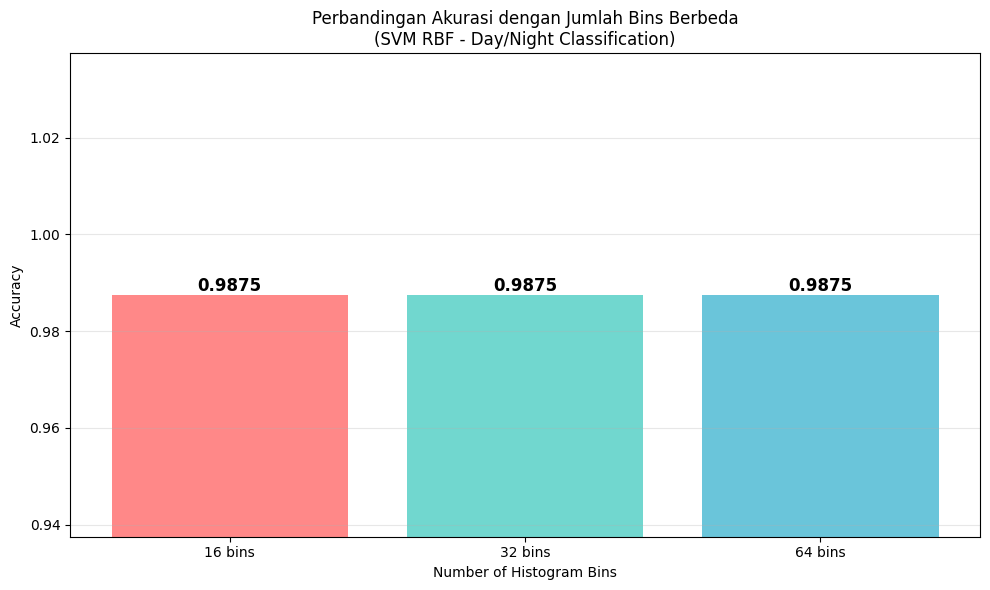

In [ ]:
# Visualize bin size comparison
plt.figure(figsize=(10, 6))
bins_list = list(bin_results.keys())
accuracies = list(bin_results.values())

bars = plt.bar(range(len(bins_list)), accuracies, color=['#FF6B6B', '#4ECDC4', '#45B7D1'], alpha=0.8)
plt.xlabel('Number of Histogram Bins')
plt.ylabel('Accuracy')
plt.title('Perbandingan Akurasi dengan Jumlah Bins Berbeda\n(SVM RBF - Day/Night Classification)')
plt.xticks(range(len(bins_list)), [f'{b} bins' for b in bins_list])
plt.ylim(min(accuracies) - 0.05, max(accuracies) + 0.05)
plt.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for i, (bar, acc) in enumerate(zip(bars, accuracies)):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{acc:.4f}',
             ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

## Langkah 10 - Kesimpulan

### Bagian 1: Voice Dataset
Dari eksperimen dengan Voice Dataset, kita dapat melihat performa berbagai kombinasi split ratio dan kernel SVM:
- **Linear Kernel**: Memberikan performa yang konsisten di kedua split ratio
- **Polynomial Kernel**: Menunjukkan hasil yang bervariasi tergantung split ratio
- **RBF Kernel**: Umumnya memberikan performa terbaik untuk klasifikasi data voice

### Bagian 2: Day/Night Classification dengan Histogram
Dari eksperimen klasifikasi siang/malam menggunakan fitur histogram:
- **Fitur Histogram dari HSV** memberikan representasi yang baik untuk membedakan siang dan malam
- **Hyperparameter Tuning** sangat penting untuk mendapatkan performa optimal
- **Jumlah Bins** mempengaruhi dimensi fitur dan akurasi model:
  - Bins lebih sedikit (16): Fitur lebih compact tapi mungkin kehilangan detail
  - Bins lebih banyak (64): Fitur lebih detail tapi berisiko overfitting
  - Bins sedang (32): Biasanya memberikan trade-off terbaik

**Catatan:** Model SVM dengan kernel RBF sangat efektif untuk klasifikasi dengan fitur yang telah diekstrak dengan baik seperti histogram.